Bias = Seberapa jauh hasil prediksi dengan hasil asli<br>
Variance = Seberapa bagus model yang kita bangun dalam menangani unseen data<br>
yang dicari adalah, low bias dan low variance<br>
Model complexity adalah fleksibilitas dari model yang kita bangun<br>
As the complexity of <b>model</b> increases, the bias term decreases while the variance term increases

<a href="https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/">Voting Classifier</a><br>
<p>Berbagai kombinasi model untuk satu data</p>

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('../Data/wbc.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
drop = ['Unnamed: 32','id']

data.drop(drop,1,inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
ss = StandardScaler()
le = LabelEncoder()

cancer = le.fit_transform(data['diagnosis'])

data.drop('diagnosis',1,inplace=True)

In [6]:
data.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
cancer[:2]

array([1, 1])

In [8]:
data_val = ss.fit_transform(data.values)

data = pd.DataFrame(
    data=data_val,
    index=data.index,
    columns=data.columns
)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [9]:
X_train,X_test,y_train,y_test = train_test_split(data,cancer,test_size=0.2,random_state=1)

In [10]:
est = [('logreg',LogisticRegression()),('dtc',DecisionTreeClassifier()),('knn',KNeighborsClassifier())]
est

[('logreg', LogisticRegression()),
 ('dtc', DecisionTreeClassifier()),
 ('knn', KNeighborsClassifier())]

In [11]:
hard = VotingClassifier(estimators=est,voting='hard')
hard.fit(X_train,y_train)
hard_pred = hard.predict(X_test)

In [12]:
soft = VotingClassifier(estimators=est,voting='soft')
soft.fit(X_train,y_train)
soft_pred = soft.predict(X_test)

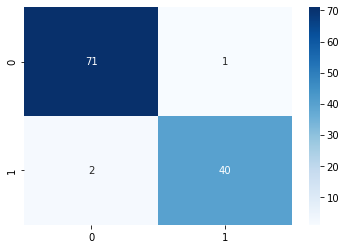

In [18]:
sns.heatmap(confusion_matrix(y_test,hard_pred),annot=True,fmt='g',cmap='Blues')
plt.show()

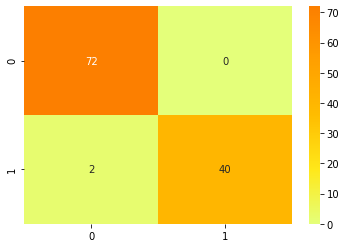

In [17]:
sns.heatmap(confusion_matrix(y_test,soft_pred),annot=True,fmt='g',cmap='Wistia')
plt.show()

### Make a voting classifier using liver dataset

<h1 style="text-align:center">Bagging Classifier</h1>

Berbagai kombinasi data untuk satu model

In [23]:
from sklearn.ensemble import BaggingClassifier

logreg = LogisticRegression()

bc = BaggingClassifier(base_estimator = logreg, n_estimators=10, random_state=1)

from sklearn.model_selection import cross_val_score

cv = cross_val_score(bc,X_train,y_train,cv=5)
cv

array([0.95604396, 0.93406593, 1.        , 0.96703297, 0.97802198])

In [24]:
cv.mean()

0.9670329670329669

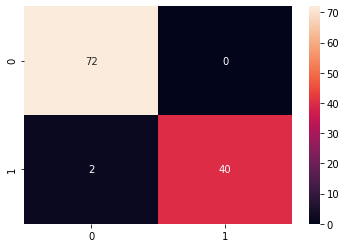

In [26]:
bc.fit(X_train,y_train)

pred_bc = bc.predict(X_test)
sns.heatmap(confusion_matrix(y_test,pred_bc),annot=True,fmt='g')
plt.show()

<h1 style='text-align:center'>OOB Score</h1>

In [31]:
from sklearn.ensemble import BaggingClassifier

logreg = LogisticRegression()

bc = BaggingClassifier(base_estimator = logreg, n_estimators=50, random_state=1, oob_score=True)

bc.fit(X_train,y_train)

prd = bc.predict(X_test)

from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test,prd)

scr = bc.oob_score_

print(acc_test)
print(scr)

0.9824561403508771
0.9736263736263736
